# Chapter 6, Exercise 3 (p. 260)

## a

iv. Steadily decrease. 

As $s$ increases, the model becomes more flexible and fits the traning data better, so the training RSS always decreases. 

## b

ii. Decrease initially, and then eventually start increasing in a U shape.

The test RSS decreases ﬁrst, and then increases. Increases of $s$ generates a closer ﬁt before overﬁtting.

## c

iii. Steadily increase.

The variance increases as $s$ increases because the model relies on the input data more.

## d

iv. Steadily decrease.

The bias decreases as $s$ increases because the model has less constraints and becomes more flexible.

## e

v. Remain constant. 

The irreducible error depends on the distribution of $\epsilon$, regardless of the model.

# Chapter 6, Exercise 4 (p. 260)

## a

iii. Steadily increase.

As we increase $\lambda$, the input data plays a smaller role in the model and $\beta_1$, $\beta_2$, $\cdots \beta_j$ decrease to 0. Therefore, the training RSS will increase.


## b

ii. Decrease initially, and then eventually start increasing in a U shape.

The test RSS decreases ﬁrst as increasing $\lambda$ make some $\beta_j$ close to zero, because overfitting is reduced. As $\lambda$ continues to increase, the model becomes too weak and test RSS increases.

## c

iv. Steadily decrease.

As we increase $\lambda$, the model relies on the input data less. So the variance is reduced.

## d

iii. Steadily increase.

As we increase $\lambda$, the model relies on the input data less. More and more $\beta_j$ becomes zero and the model becomes simpler. Therefore, the bias increases.  


## e

v. Remain constant. 

The irreducible error depends on the distribution of $\epsilon$, regardless of the model.

# Chapter 6, Exercise 9 (p. 263)

*Don’t do parts (e), (f), and (g).*


In [1]:
library(ISLR)
data(College)
attach(College)

Warning message:
“package ‘ISLR’ was built under R version 3.4.2”

## a

In [2]:
set.seed(2333)
n = nrow(College)
tid = sample(1:n, n/2)
train = College[tid,]
test = College[-tid,]
# summary(train)
# summary(test)

## b

In [3]:
lm.fit = lm(Apps~., data=train)
# summary(lm.fit)
lm.pred = predict(lm.fit, test)
mean((test[, "Apps"] - lm.pred)^2)

[1] 1566742

## c

In [4]:
library(glmnet)

Warning message:
“package ‘glmnet’ was built under R version 3.4.4”Loading required package: Matrix
Loading required package: foreach
Warning message:
“package ‘foreach’ was built under R version 3.4.3”Loaded glmnet 2.0-16



In [5]:
train_mat = model.matrix(Apps~., data=train)
test_mat = model.matrix(Apps~., data=test)
ridge.fit = cv.glmnet(train_mat, train$Apps, alpha=0)
ridge.lambda = ridge.fit$lambda.min
ridge.lambda
ridge.pred = predict(ridge.fit, s=ridge.lambda, newx=test_mat)
mean((test[, "Apps"] - ridge.pred)^2)

[1] 370.4786

[1] 2455351

## d

In [6]:
lasso.fit = cv.glmnet(train_mat, train$Apps, alpha=1)
lasso.lambda = lasso.fit$lambda.min
lasso.lambda
lasso.pred = predict(lasso.fit, s=lasso.lambda, newx=test_mat)
mean((test[, "Apps"] - lasso.pred)^2)
lasso.coef = predict(lasso.fit, type="coefficients", s=lasso.lambda)[1:ncol(College),]
# lasso.coef
length(lasso.coef[lasso.coef != 0])

[1] 12.70916

[1] 1663737

[1] 15

# Chapter 8, Exercise 4 (p. 332)

## a

![](X1<1.pdf)

## b

![](Rplot.svg)

# Chapter 8, Exercise 8 (p. 333)


In [1]:
library(ISLR)
data(Carseats)
attach(Carseats)

Warning message:
“package ‘ISLR’ was built under R version 3.4.2”

## a

In [2]:
set.seed(1)
n = nrow(Carseats)
tid = sample(1:n, n/2)
train = Carseats[tid,]
test = Carseats[-tid,]
# summary(train)
# summary(test)

## b

Warning message:
“package ‘tree’ was built under R version 3.4.4”


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Income"      "Age"        
[6] "Population"  "Advertising"
Number of terminal nodes:  19 
Residual mean deviance:  2.455 = 739 / 301 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.14700 -1.12400 -0.03704  0.00000  1.07600  4.19400 

[1] 4.539802

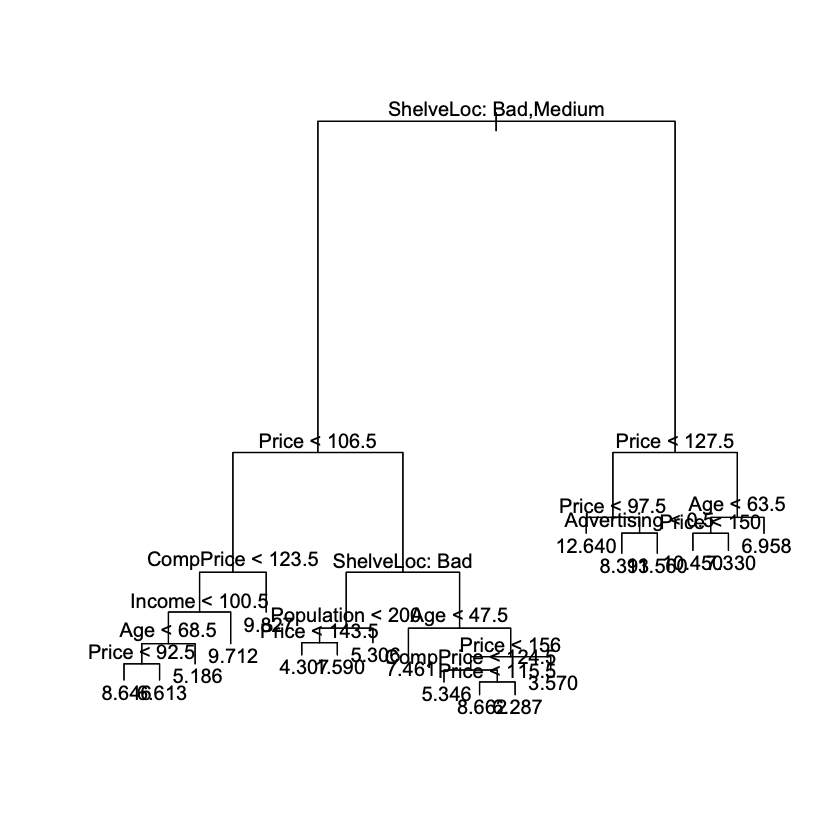

In [3]:
library(tree)
tree.fit = tree(Sales ~ ., data = train)
summary(tree.fit)
plot(tree.fit)
text(tree.fit, pretty = 0)
tree.pred = predict(tree.fit, test)
mean((test$Sales - tree.pred)^2)

Brief Interpretation:

- For ShelveLoc, whether it's bad/medium is important.
- The price and age are predictors of great importance.
- For good ShelveLoc, less factors are needed to predict.
- CompPrice and Advertising are also useful predictors.
- ...

## c


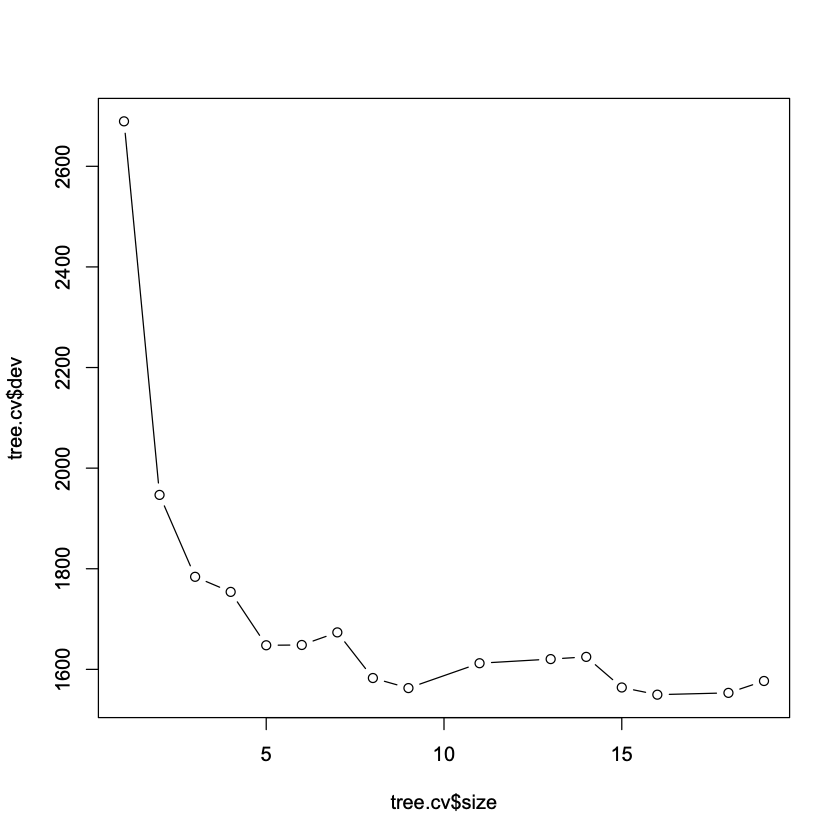

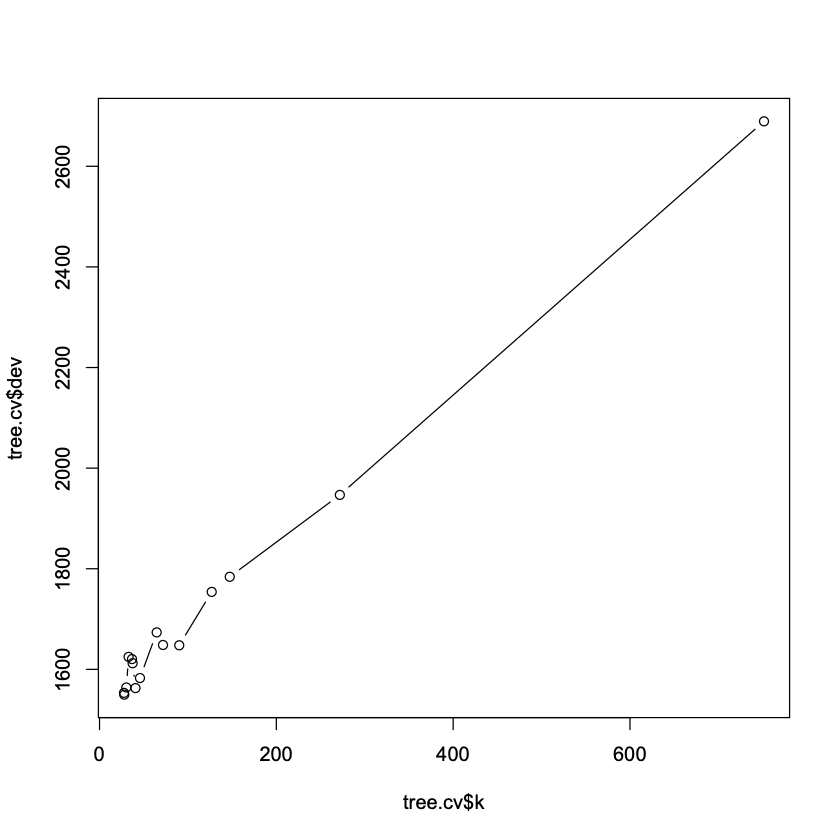

In [7]:
set.seed(1)
tree.cv = cv.tree(tree.fit)
plot(tree.cv$size, tree.cv$dev, type = "b")
plot(tree.cv$k, tree.cv$dev, type = "b")
# tree.cv

Best size for the tree is 8.

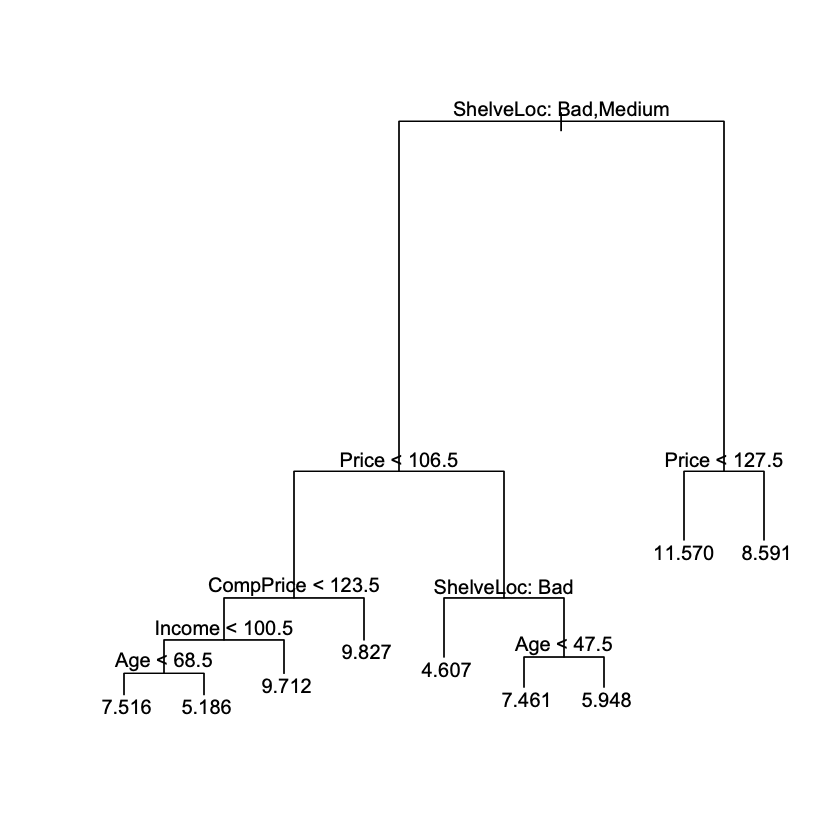

In [5]:
tree.pruned = prune.tree(tree.fit, best = 8)
plot(tree.pruned)
text(tree.pruned, pretty = 0)

In [6]:
tree.pruned.pred = predict(tree.pruned, test)
mean((test$Sales - tree.pruned.pred)^2)

[1] 5.273974

Pruning the tree increases the test MSE.

## d

In [13]:
library(randomForest)

Warning message:
“package ‘randomForest’ was built under R version 3.4.4”randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [14]:
set.seed(1)
bag.fit = randomForest(Sales ~ ., data = train, mtry = 10, ntree = 300, 
    importance = T)
bag.pred = predict(bag.fit, test)
mean((test$Sales - bag.pred)^2)

[1] 2.580626

In [15]:
importance(bag.fit)

,%IncMSE,IncNodePurity
CompPrice,13.503782,128.303295
Income,3.391201,80.808139
Advertising,13.570680,120.163245
Population,1.043478,63.157960
Price,41.621536,504.890215
ShelveLoc,33.631952,319.316806
Age,15.802791,187.304102
Education,2.381255,39.993564
Urban,-1.616887,8.876977
US,5.399367,17.180459


Use bagging method, we have a better MSE 2.58. The most important variables are `Price` and `ShelveLoc`, followed by `Age`, `CompPrice` and `Advertising`.

## e

In [16]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 5, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)
importance(rf.fit)

[1] 2.900228

,%IncMSE,IncNodePurity
CompPrice,8.1099119,129.65065
Income,3.7060291,108.72545
Advertising,9.8747924,132.37284
Population,0.2013809,83.94597
Price,35.7637894,459.96381
ShelveLoc,30.0537396,277.72879
Age,12.0634040,198.20101
Education,0.8831465,52.49984
Urban,0.3487895,10.64666
US,3.1519968,23.83161


In [17]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 6, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)

[1] 2.718236

In [18]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 7, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)

[1] 2.658267

In [19]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 8, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)

[1] 2.658222

In [20]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 9, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)

[1] 2.6172

In [21]:
set.seed(1)
rf.fit = randomForest(Sales ~ ., data = train, mtry = 10, ntree = 300, 
    importance = T)
rf.pred = predict(rf.fit, test)
mean((test$Sales - rf.pred)^2)

[1] 2.580626

We have `Price` and `ShelveLoc` are the most important variables, followed by `Age`, `CompPrice`, `Advertising` and `income`.

As m increases from 5 to 10, the MSE decreases.